Esse breve código foi criado para aplicação dos filtros propostos por Codado et al (2020). Para tanto, usamos a interface OpenAlex para obtenção dos artigos científicos a serem analisados, na raspagem buscamos por todos os artigos catalogados das revistas propostas por codato em seu trabalho. Aplicamos seu critério, selecionando apenas os artigos que tiverem "politic" em seu abstract. Por último, filtramos apenas os artigos dos quais temos acesso ao texto completo em PDF online.

In [23]:
import pandas as pd
import os
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#Essa função é responsável por detectar caso um texto tenha "politic"
def contains_politic(text):
    if pd.isnull(text):
        return False
    return "politic" in text.lower()


#A função filtering é responsável por filtrar os artigos que tem o termo
#politic no abstract e que tenham o texto completo em PDF
def filtering(name):

  caminho = '/content/drive/My Drive/Material_IC/Corpus/open_alex_archive/' + name

  df_ex = pd.read_csv(caminho)

  fields = [
    "id",
    "doi",
    "title",
    "publication year",
    "corresponding_author_ids",
    "corresponding_institution_ids",
    "has_fulltext",
    "cited_by_count",
    "is_retracted",
    "referenced_works_count",
    "referenced_works",
    "primary_location.pdf_url",
    "primary_location.source.display_name",
    "primary_location.source.host_organization_lineage_names",
    "primary_location.source.type",
    "open_access.any_repository_has_fulltext",
    "abstract",
    "authorships.institutions",
    "authorships.countries",
    "authorships.raw_author_name",
    "authorships.raw_affiliation_strings",
    "authorships.affiliations",
    "authorships.author.id",
    "authorships.author.orcid",
    "locations.pdf_url",
    "locations.is_published"
    "language" ]

  df = pd.DataFrame(df_ex, columns=fields)
  # Aplicar a função na coluna 'abstract' e criar uma nova coluna 'contains_politic'
  df["contains_politic"] = df["abstract"].apply(contains_politic)
  df2 = df[df['contains_politic'] == True].reset_index()
  df3 = df2[df2["has_fulltext"] == True].reset_index()

  return df3

df = filtering("dados.csv")

In [17]:
fields = [
    "id",
    "doi",
    "title",
    "publication year",
    "corresponding_author_ids",
    "corresponding_institution_ids",
    "has_fulltext",
    "cited_by_count",
    "is_retracted",
    "referenced_works_count",
    "referenced_works",
    "primary_location.pdf_url",
    "primary_location.source.display_name",
    "primary_location.source.host_organization_lineage_names",
    "primary_location.source.type",
    "open_access.any_repository_has_fulltext",
    "abstract",
    "authorships.institutions",
    "authorships.countries",
    "authorships.raw_author_name",
    "authorships.raw_affiliation_strings",
    "authorships.affiliations",
    "authorships.author.id",
    "authorships.author.orcid",
    "locations.pdf_url",
    "locations.is_published"
    "language" ]

df = pd.DataFrame(columns=fields)

folder_path = '/content/drive/My Drive/Material_IC/Corpus/open_alex_archive/'

for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith('.csv'):
          df = pd.concat([df, filtering(file_name)], ignore_index=True)




<ipython-input-16-4a53c5fd183d>:14: DtypeWarning: Columns (49,50,92,93,97,98,130,131,132,133,134,159,160,161,162,163,164,165,166,167,168,169) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ex = pd.read_csv(caminho)
<ipython-input-16-4a53c5fd183d>:14: DtypeWarning: Columns (36,49,50,51,68,87,88,102,104,106,107,109,120,121,122,123,124,125,143,144,145,146,147,171,172,173,174,175,176) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ex = pd.read_csv(caminho)


In [31]:
#filtra o código para manter apenas os trabalhos com link para pdf
df.replace('None', None, inplace=True)
df.dropna(how='all', inplace=True)
df['locations.pdf_url'] = df['locations.pdf_url'].str.split('|').str[-1].str.strip()
df = df[df["locations.pdf_url"] != None]
df = df[df['locations.pdf_url'].str.startswith('https', na=False)]

#corrige o formato do DOI
df['doi'] = df['doi'].str.replace('https://doi.org/', '', regex=False)


0      10.1590/s0011-52581997000200003
1      10.1590/s0011-52582011000300002
2         10.1590/dados.2023.66.2.303x
3      10.1590/s0011-52582005000200001
4      10.1590/s0011-52582007000200001
                    ...               
955                 10.1111/blar.13439
957                 10.1111/blar.13298
959      10.1080/08263663.2017.1281942
960      10.1080/08263663.2017.1334305
961      10.1080/08263663.2017.1329062
Name: doi, Length: 845, dtype: object


Para ter certeza que os trabalhos que estamos raspando são encontrados na plataforma Scopus aplicaremos um filtro nos DOI para garantir que estes são os mesmos presentes na plataforma.

In [35]:

caminho = '/content/drive/My Drive/Material_IC/Corpus/banco_scopus.csv'

df_s = pd.read_csv(caminho)
df = df[df['doi'].isin(df_s['DOI'])]

In [36]:
#Fazendo downloas dos documentos
df.to_csv('cleaned_dataframe.csv', index=False)
files.download('cleaned_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vamos ver como ficou a distribuição de nossa raspagem dentres as revistas:

<ipython-input-38-20182abe638b>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajustar os elementos do layout


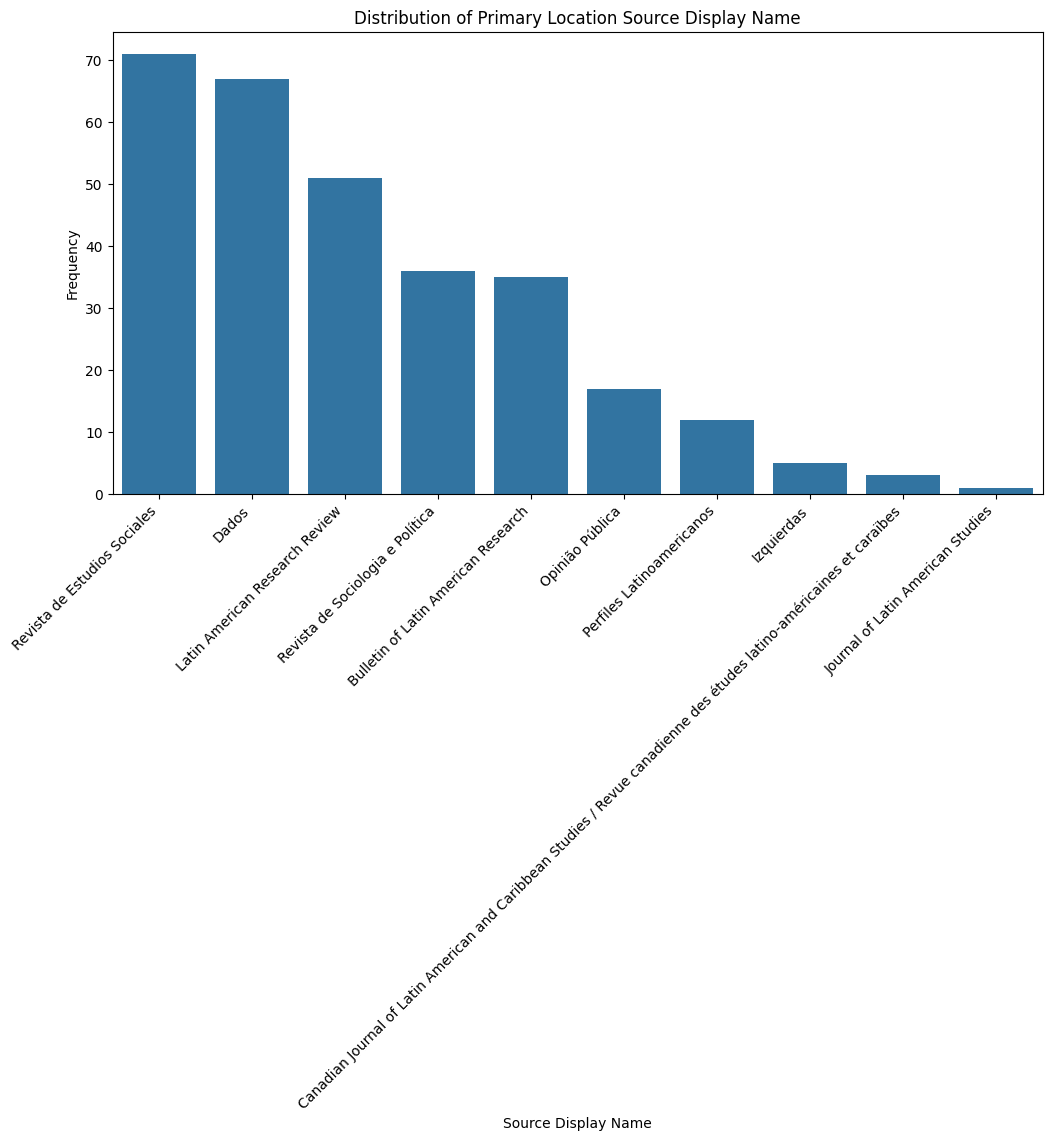

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a frequência de cada valor único em "primary_location.source.display_name"
source_distribution = df['primary_location.source.display_name'].value_counts()

# Criar o histograma
plt.figure(figsize=(12, 6))
sns.barplot(x=source_distribution.index, y=source_distribution.values)
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x
plt.xlabel('Source Display Name')
plt.ylabel('Frequency')
plt.title('Distribution of Primary Location Source Display Name')
plt.tight_layout()  # Ajustar os elementos do layout

# Mostrar o gráfico
plt.show()